In [24]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os
import cv2
from tqdm import tqdm
import numpy as np
from tensorflow_docs.plots import HistoryPlotter

os.chdir('/home/fabricio/Documentos/universidad/cv/insulators-cv/')
from src.pre_processing import Pre_processing

In [9]:
data_dir = '../InsulatorsDataSet/'
img_path = []
img_data = []
labels = []
# extraction_features in format list( (extraction, kaolin(g/l)) )
extraction_features = [('03',3),('04',1),('05',4),('06',2),('07', 0),('08',5)]
for i in range(len(extraction_features)):
    idx = extraction_features[i][0]
    kaolin = extraction_features[i][1]
    print(f"Loading {data_dir+idx+' Extraction/'} images...")
    for insulators_dir in tqdm(os.listdir(data_dir+idx+' Extraction')):
        for img in os.listdir(data_dir+idx+' Extraction/'+insulators_dir):
            if img.split("_")[1] == "35.jpg":
                pre_processing = Pre_processing(data_dir+idx+' Extraction/'+insulators_dir+"/"+img)
                pre_processing.operate()
                for result in pre_processing.results:
                    img_data.append(result.reshape(-1))
                img_path += [data_dir+idx+' Extraction/'+insulators_dir+"/"+img]*5
                labels += [kaolin]*5
    break
df = pd.DataFrame({'img': img_path, 'preprocessed': img_data , 'label':labels})

Loading ../InsulatorsDataSet/03 Extraction/ images...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.58s/it]


In [8]:
from src.utils import load_data
from sklearn.model_selection import train_test_split
from tensorflow.random import set_seed

In [4]:
x, y = load_data()

Loading ../InsulatorsDataSet/03 Extraction/ images...
Loading ../InsulatorsDataSet/04 Extraction/ images...
Loading ../InsulatorsDataSet/05 Extraction/ images...
Loading ../InsulatorsDataSet/06 Extraction/ images...
Loading ../InsulatorsDataSet/07 Extraction/ images...
Loading ../InsulatorsDataSet/08 Extraction/ images...


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [14]:
np.random.seed(42)
set_seed(42)
classifier = Sequential()
classifier.add(Dense(units = 25, activation = "softsign", input_shape = (634014,)))
classifier.add(Dense(units = 6, activation = 'softmax'))
classifier.compile(optimizer = 'nadam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [15]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
classifier.fit(np.array([x/255 for x in x_train]), np.array(y_train), epochs=200, verbose=1, validation_split=0.2)

Epoch 1/200
14/14 [==============================] - 3s 152ms/step - loss: 2.3902 - accuracy: 0.2431 - val_loss: 1.6839 - val_accuracy: 0.3519
Epoch 2/200
14/14 [==============================] - 2s 131ms/step - loss: 1.4290 - accuracy: 0.4375 - val_loss: 1.4693 - val_accuracy: 0.4259
Epoch 3/200
14/14 [==============================] - 2s 132ms/step - loss: 1.1044 - accuracy: 0.6111 - val_loss: 1.4100 - val_accuracy: 0.4259
Epoch 4/200
14/14 [==============================] - 2s 136ms/step - loss: 0.9932 - accuracy: 0.6690 - val_loss: 1.3354 - val_accuracy: 0.5093
Epoch 5/200
14/14 [==============================] - 2s 131ms/step - loss: 0.8406 - accuracy: 0.7454 - val_loss: 1.2483 - val_accuracy: 0.5463
Epoch 6/200
14/14 [==============================] - 2s 132ms/step - loss: 0.7125 - accuracy: 0.7870 - val_loss: 1.2398 - val_accuracy: 0.5000
Epoch 7/200
14/14 [==============================] - 2s 132ms/step - loss: 0.6744 - accuracy: 0.8241 - val_loss: 1.1113 - val_accuracy: 0.6111

Epoch 58/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0959 - accuracy: 0.9815 - val_loss: 0.6241 - val_accuracy: 0.7963
Epoch 59/200
14/14 [==============================] - 2s 133ms/step - loss: 0.0813 - accuracy: 0.9861 - val_loss: 0.5910 - val_accuracy: 0.8333
Epoch 60/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0878 - accuracy: 0.9838 - val_loss: 0.6010 - val_accuracy: 0.8148
Epoch 61/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0724 - accuracy: 0.9931 - val_loss: 0.6110 - val_accuracy: 0.8241
Epoch 62/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0583 - accuracy: 1.0000 - val_loss: 0.5226 - val_accuracy: 0.8426
Epoch 63/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0527 - accuracy: 0.9907 - val_loss: 0.5580 - val_accuracy: 0.8148
Epoch 64/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0540 - accuracy: 0.9954 - val_loss: 0.5459 - val_accuracy:

Epoch 115/200
14/14 [==============================] - 2s 131ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.5070 - val_accuracy: 0.8796
Epoch 116/200
14/14 [==============================] - 2s 131ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.5077 - val_accuracy: 0.8796
Epoch 117/200
14/14 [==============================] - 2s 131ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.5084 - val_accuracy: 0.8796
Epoch 118/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.5028 - val_accuracy: 0.8796
Epoch 119/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.4998 - val_accuracy: 0.8796
Epoch 120/200
14/14 [==============================] - 2s 133ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.5080 - val_accuracy: 0.8796
Epoch 121/200
14/14 [==============================] - 2s 132ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.5041 - val_ac

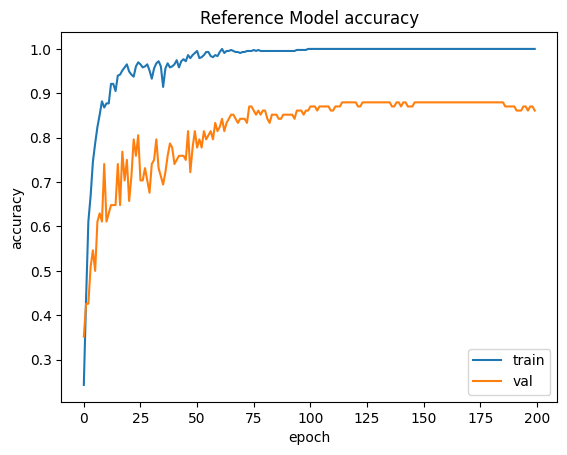

In [38]:
from matplotlib import pyplot as plt
history = classifier.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Reference Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('reference_model_200ep_acc.png')
plt.show()

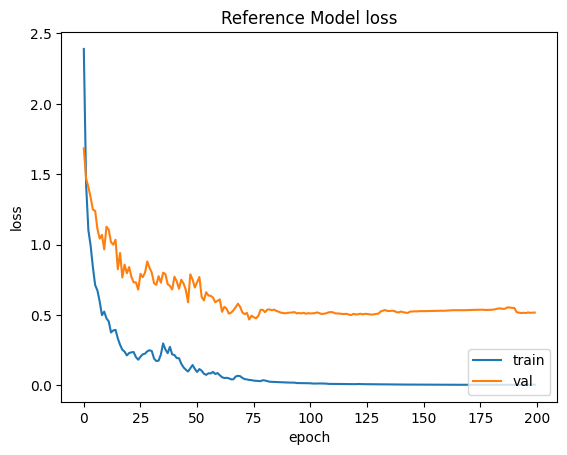

In [42]:
from matplotlib import pyplot as plt
history = classifier.history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Reference Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('reference_model_200ep_loss.png')
plt.show()

In [36]:
classifier.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
classifier.evaluate(np.array([x/255 for x in x_test]), np.array(y_test))

2/2 [==============================] - 0s 274ms/step - loss: 0.2862 - accuracy: 0.9167


[0.2862113416194916, 0.9166666865348816]

In [44]:
classifier.evaluate?

In [45]:
classifier.metrics_names

['loss', 'accuracy']

In [43]:
classifier.save('reference_model_100ep.h5')

In [48]:
from tensorflow.keras.models import load_model
model1 = load_model('reference_model_100ep.h5')

In [17]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)

SVC(gamma='auto')

In [19]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
clf.score(x_test, y_test)

0.08333333333333333